In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math
import sys

#classes
sys.path.append(".")
import Track as trk

sys.path.append("../modules")
import TiffProcessing as tp

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap



cmap_green = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'darkgreen'),
                                                          (0.5, 'lime'),
                                                    (1.0, 'aquamarine')]
                                        )

cmap_magenta = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'purple'),
                                                          (0.5, 'magenta'),
                                                    (1.0, 'pink')]
                                        )


cmap_red = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'maroon'),
                                                          (0.5, 'red'),
                                                    (1.0, 'orange')]
                                        )



# read in the data

In [3]:
inputParameters = pd.read_csv('../../_inputParameters.csv',names=['key','value'])
inputParameters.style.set_properties(**{'text-align': 'left'})
#inputParameters

,key,value
0,inputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
1,outputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/output
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,framerate_msec,5689
5,ch0_outputDataFolder,output_488
6,ch0_uniqueFilenameString,488nm_0
7,ch0_detectionFilename,Detection3D.mat
8,ch0_trackingFilename,trackedFeatures.mat
9,ch0_trackingCsvFilename,trackedFeatures.csv


In [4]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [5]:
outputDataFolder = getInputParameter(inputParameters,"outputDataFolder")
ch0_outputDataFolder  = getInputParameter(inputParameters,"ch0_outputDataFolder")
ch0_trackingCsvFilename = getInputParameter(inputParameters,"ch0_trackingCsvFilename")
ch1_outputDataFolder  = getInputParameter(inputParameters,"ch1_outputDataFolder")
ch1_trackingCsvFilename = getInputParameter(inputParameters,"ch1_trackingCsvFilename")
#trackColor = getInputParameter(inputParameters,"trackColor")
#trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
#framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
#movieLength = float(getInputParameter(inputParameters,"movieLength"))
#print(trackColor)



In [6]:
data0 = pd.read_csv(outputDataFolder+'/'+ch0_outputDataFolder+'/'+ch0_trackingCsvFilename,header=0)
data0.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]
trackIdsLong0 = (data0[data0['tracklength'] > 10]).drop_duplicates(subset='trackId')['trackId'].values
trackIds0 = data0.drop_duplicates(subset='trackId')['trackId'].values
#data0 = data0.drop_duplicates(subset='trackId')

data1 = pd.read_csv(outputDataFolder+'/'+ch1_outputDataFolder+'/'+ch1_trackingCsvFilename,header=0)
data1.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]
trackIdsLong1 = (data1[data1['tracklength'] > 10]).drop_duplicates(subset='trackId')['trackId'].values
trackIds1 = data1.drop_duplicates(subset='trackId')['trackId'].values
data1[0:5]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,123,2.401194e+02,3.449448e+02,4.499062e+01,1.935832e+04,7.636581e-02,7.634770e-02,7.634294e-02,8.918059e+02
1,1,70,2,0,2.398080e+02,3.455938e+02,4.452885e+01,2.285881e+04,5.624323e-02,5.640477e-02,5.648089e-02,7.705259e+02
2,1,70,3,121,2.396020e+02,3.457261e+02,4.401741e+01,2.191670e+04,6.825404e-02,6.812530e-02,6.801579e-02,8.966284e+02
3,1,70,4,90,2.400139e+02,3.457024e+02,4.475419e+01,2.231589e+04,5.023574e-02,5.033191e-02,5.030067e-02,6.751585e+02
4,1,70,5,85,2.397104e+02,3.454962e+02,4.467903e+01,2.411560e+04,5.471115e-02,5.492841e-02,5.473449e-02,7.897406e+02


# read in tracks from channel 0

In [7]:
trk.Track

Track.Track

In [8]:
import timeit

start_time = timeit.default_timer()

tracks0 = []
cm0 = []
len0 = []
Amean0 = []
maxDist0 = []

for i in range(0,len(trackIdsLong0)):
    if(i %1000 == 0):
        print(str(i)+"/"+str(len(trackIdsLong0)))
    a = trk.Track(data0[data0['trackId'] == trackIdsLong0[i]])
    tracks0.append(a)
    cm0.append(a.cm)
    len0.append(a.len)
    Amean0.append(a.Amean)
    maxDist0.append(a.maxDist)
    
elapsed = timeit.default_timer() - start_time
print('time elapse: '+str(np.round(elapsed,decimals=2))+'s')

0/3985
1000/3985
2000/3985
3000/3985
time elapse: 15.34s


(-500, 500)

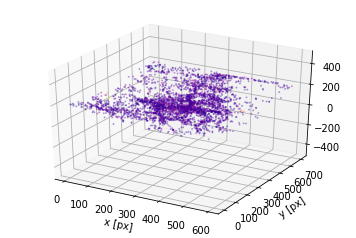

In [9]:
cm0 = np.array(cm0)
#plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(cm0[:,0], cm0[:,1], cm0[:,2],c=np.log(Amean0),cmap='plasma',s=1,alpha=0.3);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
#plt.xlim(-200,800)
#plt.ylim(-200,800)
ax.set_zlim(-500,500)

# read in tracks from channel 1

In [10]:
import timeit

start_time = timeit.default_timer()


tracks1 = []
cm1 = []
Amean1 = []
Afirst = []
maxDist1 = []
len1= []
for i in range(0,len(trackIdsLong1)):
    if(i %1000 == 0):
        print(str(i)+"/"+str(len(trackIdsLong1)))
    a = trk.Track(data1[data1['trackId'] == trackIdsLong1[i]])
    tracks1.append(a)
    cm1.append(a.cm)
    len1.append(a.len)
    Amean1.append(a.Amean)
    Afirst.append(a.A[0])
    maxDist1.append(a.maxDist)
    
elapsed = timeit.default_timer() - start_time
print('time elapse: '+str(np.round(elapsed,decimals=2))+'s')

0/2066
1000/2066
2000/2066
time elapse: 5.99s


(-500, 500)

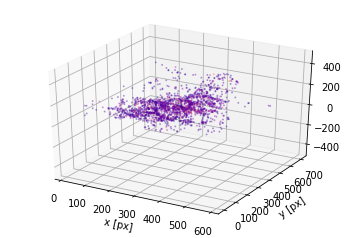

In [11]:
cm1 = np.array(cm1)
#plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(cm1[:,0], cm1[:,1], cm1[:,2],c=np.log(Amean1),cmap='plasma',s=1,alpha=0.3);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
#plt.xlim(-200,800)
#plt.ylim(-200,800)
ax.set_zlim(-500,500)

# test the write BILD file function

In [12]:
t0 = tracks0[0]
filename = '_tmp__track_488_'+str(t0.id)+'.bild'

print(filename)
t0.writeBILD(filename,color='green',center=t0.cm-np.array([20,20,20]))

t1 = tracks1[0]
filename = '_tmp__track_560_'+str(t1.id)+'.bild'
print(filename)
t1.writeBILD(filename,color='red',center=t1.cm-np.array([20,20,20]))

_tmp__track_488_1.bild
_tmp__track_560_1.bild


# test the write Tiff box function

In [13]:
import skimage

import json

class Track:
    def __init__(self,pandasTrackData):
        tracklength = int((pandasTrackData['tracklength'].values)[0])

        #trim the end of the track until you got rid of all the nans
        xCoordLastEntry = pandasTrackData[tracklength-1:tracklength]['x'].astype(float).values
        #print(xCoordLastEntry,tracklength)
        while np.isnan(xCoordLastEntry):
            tracklength = tracklength-1
            xCoordLastEntry = pandasTrackData[tracklength-1:tracklength]['x'].astype(float).values
            #print(xCoordLastEntry,tracklength)

        track = pandasTrackData[0:tracklength] # this function kills all the NaNs that come from matlab

        self.id = track['trackId'].astype(int).values[0]
        self.len = tracklength

        self.coords = track[['x','y','z']].astype(float).values


        self.cm = np.nanmean(self.coords,axis=0)
        self.maxDist = np.linalg.norm(self.coords[0]-self.coords[-1])

        self.particleIDs = track['particleId'].astype(int).values
        self.A = track['A'].astype(float).values
        self.Amean = np.nanmean(self.A)

        self.frameIDs = track['frameId'].astype(int).values

    def reveal(self):
        print('id',self.id)
        print('tracklength',self.len)
        print('center of mass',self.cm)
        print('coords',self.coords)
        print('particleIDs',self.particleIDs)
        print('A',self.A)
        print('frameIDs',self.frameIDs)


    def plot(self):
        plt.figure(dpi=300)
        ax = plt.axes(projection='3d')
        ax.plot3D(self.coords[:,0], self.coords[:,1], self.coords[:,2], 'grey')
        ax.scatter3D(self.coords[:,0], self.coords[:,1], self.coords[:,2],c=self.A, cmap='plasma',s=100);
        plt.xlabel('x [px]')
        plt.ylabel('y [px]')

    def writeBILD(self,BILDfilename,color='black',center=[]):
        filename=BILDfilename
        file = open(BILDfilename,'w')

        file.write(".transparency 0.5\n")
        file.write(".color "+color+"\n")

        line = ".comment trackID"+str(self.id)+"\n"
        file.write(line)



        for i in range(1,self.len):
            tzero = self.coords[i-1]
            tone = self.coords[i]
            if len(center) != 0:
                tzero = tzero-center
                tone = tone-center



            # Data for a three-dimensional line
            x0 = float(tzero[0])
            y0 = float(tzero[1])
            z0 = float(tzero[2])
            A0 = float(self.A[i-1])

            x1 = float(tone[0])
            y1 = float(tone[1])
            z1 = float(tone[2])
            A1 = float(self.A[i])

            if(math.isnan(x0) or math.isnan(y0) or math.isnan(z0) or math.isnan(x1) or math.isnan(y1) or math.isnan(z1)):
                line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"
                print(line)
                file.write(".comment "+line)
                continue

            line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"
            file.write(line)

        file.close()
        
        
    def writeTiffBoxesAroundEveryDetection(self,tiffFilename,tiffImageSize=[40,40,40],center=[]):
        

        centerOfImage = np.array([tiffImageSize[0]//2,tiffImageSize[1]//2,tiffImageSize[2]//2])-np.array([1,1,1])

        #### </matlab weirdo> ####
        #### warning, i have to invert all the coordinates to get back to tiff coordinates ####
        #### this is a problem that comes from the matlab code.. lets see what we can do here
        trackCoordsRaw = self.coords
        trackCoordsRaw[:,[0, 1,2]] = trackCoordsRaw[:,[2, 1, 0]]
        trackCoords = trackCoordsRaw.astype(int)
        
        
        centerOfMass = np.array([self.cm.astype(int)[2],self.cm.astype(int)[1],self.cm.astype(int)[0]])
        #### </matlab weirdo> ####
        
        # recenter all track coordinates to the center of mass of the track
        if len(center) == 0:
            boxCenters = trackCoords-centerOfMass
        else:
            boxCenters = trackCoords-np.array(center)

        
        meshIndexes = tp.getCubeMeshIndexes()
        
        counter = 0
        for boxCenter in boxCenters:
            if(counter%20 ==0):
                print(counter)
            image = np.zeros(tiffImageSize)
        
            meshIndexesAdjusted = meshIndexes+boxCenter+centerOfImage

            for index in meshIndexesAdjusted:
                image[index[0],index[1],index[2]]=10
            
            
            data = image.astype('uint16')
            metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
            metadata = json.dumps(metadata)
            skimage.external.tifffile.imsave(tiffFilename+str(counter)+'.tif', data, description=metadata)
            counter = counter +1;
        print('done')

In [14]:
import timeit

start_time = timeit.default_timer()


tracks1 = []
cm1 = []
Amean1 = []
Afirst = []
maxDist1 = []
len1= []
for i in range(0,10):
    if(i %1000 == 0):
        print(str(i)+"/"+str(len(trackIdsLong1)))
    a = Track(data1[data1['trackId'] == trackIdsLong1[i]])
    tracks1.append(a)
    cm1.append(a.cm)
    len1.append(a.len)
    Amean1.append(a.Amean)
    Afirst.append(a.A[0])
    maxDist1.append(a.maxDist)
    
elapsed = timeit.default_timer() - start_time
print('time elapse: '+str(np.round(elapsed,decimals=2))+'s')

0/2066
time elapse: 0.04s


In [15]:
t1 = tracks1[0]
filename = '_tmp__track_488_tiffTest_'

print(filename)
t1.writeTiffBoxesAroundEveryDetection(filename,tiffImageSize=[40,40,40])

_tmp__track_488_tiffTest_
0


AttributeError: module 'skimage' has no attribute 'external'

In [16]:
import skimage



In [19]:
skimage

<module 'skimage' from '/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/skimage/__init__.py'>